In [1]:
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
from xml.etree import ElementTree as et # parse information from XML
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# step-1: get path of each xml file
xmlfiles = glob('./data_images/*.xml')
# replace \\ with /
replace_text = lambda x: x.replace('\\','/')
xmlfiles = list(map(replace_text,xmlfiles))

In [7]:
xmlfiles

['./data_images/007826.xml',
 './data_images/002786.xml',
 './data_images/006286.xml',
 './data_images/002962.xml',
 './data_images/008297.xml',
 './data_images/009189.xml',
 './data_images/009823.xml',
 './data_images/002976.xml',
 './data_images/002745.xml',
 './data_images/006523.xml',
 './data_images/008268.xml',
 './data_images/004452.xml',
 './data_images/002023.xml',
 './data_images/005980.xml',
 './data_images/004446.xml',
 './data_images/002037.xml',
 './data_images/009162.xml',
 './data_images/006251.xml',
 './data_images/000620.xml',
 './data_images/000146.xml',
 './data_images/007629.xml',
 './data_images/001258.xml',
 './data_images/002751.xml',
 './data_images/002989.xml',
 './data_images/007601.xml',
 './data_images/001270.xml',
 './data_images/002779.xml',
 './data_images/005016.xml',
 './data_images/003301.xml',
 './data_images/006279.xml',
 './data_images/007167.xml',
 './data_images/008254.xml',
 './data_images/000608.xml',
 './data_images/005764.xml',
 './data_image

In [8]:
# step-2: read xml files
# from each xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # extract filename
    image_name = root.find('filename').text
    # width and height of the image
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    objs = root.findall('object')
    parser = []
    for obj in objs:
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        xmax = bndbox.find('xmax').text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser.append([image_name, width, height, name,xmin,xmax,ymin,ymax])
        
    return parser

In [9]:
parser_all = list(map(extract_text,xmlfiles))

In [10]:
data = reduce(lambda x, y : x+y,parser_all)

In [11]:
df = pd.DataFrame(data,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])

In [12]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,007826.jpg,500,375,diningtable,80,320,217,273
1,007826.jpg,500,375,chair,197,257,193,326
2,007826.jpg,500,375,chair,139,185,184,231
3,007826.jpg,500,375,chair,258,312,180,314
4,007826.jpg,500,375,chair,10,93,195,358


In [13]:
df.shape

(15663, 8)

In [14]:
df['name'].value_counts()

name
person         5447
car            1650
chair          1427
bottle          634
pottedplant     625
bird            599
dog             538
sofa            425
bicycle         418
horse           406
boat            398
motorbike       390
cat             389
tvmonitor       367
cow             356
sheep           353
aeroplane       331
train           328
diningtable     310
bus             272
Name: count, dtype: int64

#### Conversion
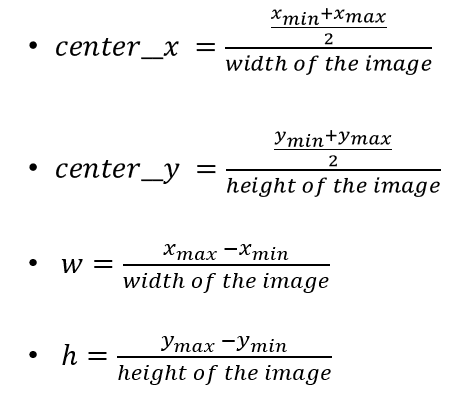

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15663 non-null  object
 1   width     15663 non-null  object
 2   height    15663 non-null  object
 3   name      15663 non-null  object
 4   xmin      15663 non-null  object
 5   xmax      15663 non-null  object
 6   ymin      15663 non-null  object
 7   ymax      15663 non-null  object
dtypes: object(8)
memory usage: 979.1+ KB


In [16]:
# type conversion
cols = ['width','height','xmin','xmax','ymin','ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15663 non-null  object
 1   width     15663 non-null  int64 
 2   height    15663 non-null  int64 
 3   name      15663 non-null  object
 4   xmin      15663 non-null  int64 
 5   xmax      15663 non-null  int64 
 6   ymin      15663 non-null  int64 
 7   ymax      15663 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 979.1+ KB


In [17]:
# center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# w 
df['w'] = (df['xmax']-df['xmin'])/df['width']
# h 
df['h'] = (df['ymax']-df['ymin'])/df['height']

In [18]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,007826.jpg,500,375,diningtable,80,320,217,273,0.400,0.653333,0.480,0.149333
1,007826.jpg,500,375,chair,197,257,193,326,0.454,0.692000,0.120,0.354667
2,007826.jpg,500,375,chair,139,185,184,231,0.324,0.553333,0.092,0.125333
3,007826.jpg,500,375,chair,258,312,180,314,0.570,0.658667,0.108,0.357333
4,007826.jpg,500,375,chair,10,93,195,358,0.103,0.737333,0.166,0.434667


### split data into train and test

In [19]:
images = df['filename'].unique()

In [20]:
len(images)

5012

In [21]:
# 80% train and 20% test
img_df = pd.DataFrame(images,columns=['filename'])
img_train = tuple(img_df.sample(frac=0.8)['filename']) # shuffle and pick 80% of images

In [22]:
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename']) # take rest 20% images

In [23]:
len(img_train), len(img_test)

(4010, 1002)

In [24]:
train_df = df.query(f'filename in {img_train}')
test_df = df.query(f'filename in {img_test}')

In [25]:
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,007826.jpg,500,375,diningtable,80,320,217,273,0.400,0.653333,0.480,0.149333
1,007826.jpg,500,375,chair,197,257,193,326,0.454,0.692000,0.120,0.354667
2,007826.jpg,500,375,chair,139,185,184,231,0.324,0.553333,0.092,0.125333
3,007826.jpg,500,375,chair,258,312,180,314,0.570,0.658667,0.108,0.357333
4,007826.jpg,500,375,chair,10,93,195,358,0.103,0.737333,0.166,0.434667


In [26]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
7,002786.jpg,500,332,horse,80,348,97,272,0.428000,0.555723,0.536000,0.527108
8,002786.jpg,500,332,person,201,258,52,202,0.459000,0.382530,0.114000,0.451807
42,002745.jpg,375,500,bottle,213,312,59,442,0.700000,0.501000,0.264000,0.766000
43,002745.jpg,375,500,pottedplant,195,367,273,383,0.749333,0.656000,0.458667,0.220000
44,002745.jpg,375,500,pottedplant,303,375,115,228,0.904000,0.343000,0.192000,0.226000


### Assign id number to object names

In [27]:
# label encoding
def label_encoding(x):
    labels = {'person':0, 'car':1, 'chair':2, 'bottle':3, 'pottedplant':4, 'bird':5, 'dog':6,
       'sofa':7, 'bicycle':8, 'horse':9, 'boat':10, 'motorbike':11, 'cat':12, 'tvmonitor':13,
       'cow':14, 'sheep':15, 'aeroplane':16, 'train':17, 'diningtable':18, 'bus':19}
    return labels[x]

In [28]:
train_df['id'] = train_df['name'].apply(label_encoding)
test_df['id'] = test_df['name'].apply(label_encoding)

In [29]:
train_df.head(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,007826.jpg,500,375,diningtable,80,320,217,273,0.400,0.653333,0.480,0.149333,18
1,007826.jpg,500,375,chair,197,257,193,326,0.454,0.692000,0.120,0.354667,2
2,007826.jpg,500,375,chair,139,185,184,231,0.324,0.553333,0.092,0.125333,2
3,007826.jpg,500,375,chair,258,312,180,314,0.570,0.658667,0.108,0.357333,2
4,007826.jpg,500,375,chair,10,93,195,358,0.103,0.737333,0.166,0.434667,2
5,007826.jpg,500,375,chair,82,243,252,372,0.325,0.832000,0.322,0.320000,2
6,007826.jpg,500,375,chair,43,144,319,375,0.187,0.925333,0.202,0.149333,2
9,006286.jpg,500,375,person,80,405,88,375,0.485,0.617333,0.650,0.765333,0
10,006286.jpg,500,375,person,436,475,147,209,0.911,0.474667,0.078,0.165333,0
11,006286.jpg,500,375,person,381,428,145,191,0.809,0.448000,0.094,0.122667,0


### Save Image and Labels in text

In [30]:
import os
from shutil import move

In [31]:
train_folder = 'data_images/train'
test_folder = 'data_images/test'


os.mkdir(train_folder)
os.mkdir(test_folder)

In [32]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [33]:
#groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)
# save each image in train/test folder and repective labels in .txt
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join('data_images',filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder
    
    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)
    

In [34]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [35]:
filename_series.apply(save_data,args=(train_folder,groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
4005    None
4006    None
4007    None
4008    None
4009    None
Length: 4010, dtype: object

In [36]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(test_folder,groupby_obj_test))

0       None
1       None
2       None
3       None
4       None
        ... 
997     None
998     None
999     None
1000    None
1001    None
Length: 1002, dtype: object